## Lepton inside AK8

/tmp/ipykernel_467786/4083110042.py:111: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if n_mother_muon_dr < 0.8:
/tmp/ipykernel_467786/4083110042.py:122: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if WR_mother_muon_dr < 0.8:


survived jet:  459
cleand jet:  39
total jet:  498


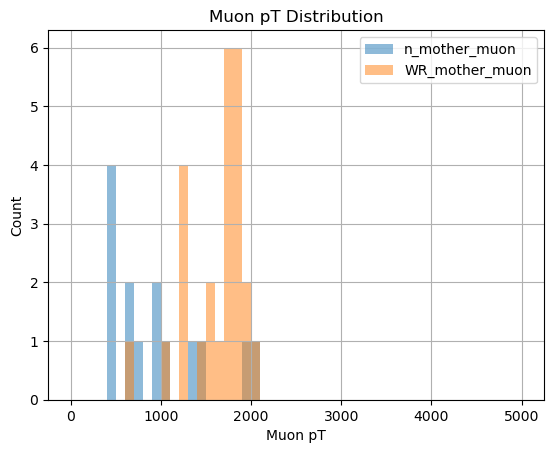

"\nplt.hist(dr_total_n_mother_muon, bins=50, range=(0, 6), alpha=0.5, label='n_mother_muon')\nplt.hist(dr_total_WR_mother_muon, bins=50, range=(0, 6), alpha=0.5, label='WR_mother_muon')\nplt.axvline(0.8, color='red', linestyle='dashed', linewidth=1, label='Delta R = 0.8')\nplt.xlabel('Delta R')\nplt.ylabel('Count')\nplt.title('Delta R Distribution')\nplt.legend()\nplt.grid()\n"

In [26]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

#muon_pt = events["Muon_pt"].array()
#muon_eta = events["Muon_eta"].array()
#muon_phi = events["Muon_phi"].array()

# For muon 
lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()

muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)
muon_pt = lhe_pt[muon_mask]
muon_eta = lhe_eta[muon_mask]
muon_phi = lhe_phi[muon_mask]

n_mother_muon_eta = muon_eta[:,0]
n_mother_muon_phi = muon_phi[:,0]
n_muon_pt = muon_pt[:,0]
WR_mother_muon_eta = muon_eta[:,1]
WR_mother_muon_phi = muon_phi[:,1]
WR_muon_pt = muon_pt[:,1]

#deltar
dr_total_n_mother_muon = []
dr_total_WR_mother_muon = []

pt_n_mother_muon = []
pt_WR_mother_muon = []

min_idx = []
second_min_idx = []
third_min_idx = []
survived_jet = 0 
cleand_jet = 0


for i in range(len(fatjet_pt)):
    if ((n_mother_muon_eta[i]) != 0 )and((WR_mother_muon_eta[i]) != 0):
        if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
            continue
        # fatjet
        top_etas = top_eta[i][1]
        top_phi = top_phi1[i][1]
    
        delta_eta = fatjet_eta[i] - top_etas
    
        delta_phi = fatjet_phi[i] -top_phi 
        delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
        #ΔR 계산
        dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
        if len(dr_jet) >1:
            idx = np.argsort(dr_jet)[0] #top AK8 jet index
            ## muon 중에 ak8 jet 과 R < 0.8 인 jet 갯수 찾기 
            ak8_eta = fatjet_eta[i][idx]
            ak8_phi = fatjet_phi[i][idx]

            n_mother_muon_deta = n_mother_muon_eta[i] - ak8_eta
            n_mother_muon_dphi = n_mother_muon_phi[i] - ak8_phi
            n_mother_muon_dphi = (n_mother_muon_dphi + np.pi) % (2 * np.pi) - np.pi
            n_mother_muon_dr = np.sqrt(n_mother_muon_deta**2 + n_mother_muon_dphi**2)
            dr_total_n_mother_muon.append(n_mother_muon_dr)
            muon_mask = n_mother_muon_dr < 0.8
            n_mother_muon_dr = n_mother_muon_dr[muon_mask]

            if n_mother_muon_dr < 0.8:
                pt_n_mother_muon.append(n_muon_pt[i])

            WR_mother_muon_deta = WR_mother_muon_eta[i] - ak8_eta
            WR_mother_muon_dphi = WR_mother_muon_phi[i] - ak8_phi
            WR_mother_muon_dphi = (WR_mother_muon_dphi + np.pi) % (2 * np.pi) - np.pi
            WR_mother_muon_dr = np.sqrt(WR_mother_muon_deta**2 + WR_mother_muon_dphi**2)
            dr_total_WR_mother_muon.append(WR_mother_muon_dr)
            WR_muon_mask = WR_mother_muon_dr < 0.8
            WR_mother_muon_dr = WR_mother_muon_dr[WR_muon_mask]
            
            if WR_mother_muon_dr < 0.8:
                pt_WR_mother_muon.append(WR_muon_pt[i])


            muon_dr = np.concatenate((n_mother_muon_dr, WR_mother_muon_dr), axis=None)
            
            
            
            #print("muon_dr: ", muon_dr)
            if len(muon_dr) > 0:
                cleand_jet += 1
            if len(muon_dr) == 0:
                survived_jet += 1

print ("survived jet: ", survived_jet)
print ("cleand jet: ", cleand_jet)
print ("total jet: ", survived_jet + cleand_jet)


plt.hist(pt_n_mother_muon, bins=50, range=(0, 5000), alpha=0.5, label='n_mother_muon')
plt.hist(pt_WR_mother_muon, bins=50, range=(0, 5000), alpha=0.5, label='WR_mother_muon')
plt.xlabel('Muon pT')
plt.ylabel('Count')
plt.title('Muon pT Distribution')
plt.legend()
plt.grid()
plt.show()


'''
plt.hist(dr_total_n_mother_muon, bins=50, range=(0, 6), alpha=0.5, label='n_mother_muon')
plt.hist(dr_total_WR_mother_muon, bins=50, range=(0, 6), alpha=0.5, label='WR_mother_muon')
plt.axvline(0.8, color='red', linestyle='dashed', linewidth=1, label='Delta R = 0.8')
plt.xlabel('Delta R')
plt.ylabel('Count')
plt.title('Delta R Distribution')
plt.legend()
plt.grid()
'''

        









## For all file

In [20]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm  # ✅ 진행률 표시

vector.register_awkward()

# 모든 .root 파일 경로 가져오기
path = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/"
file_list = sorted(glob.glob(path + "*.root"))

# 누적 리스트
def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)

dr_total_n_mother_muon_all = []
dr_total_WR_mother_muon_all = []

min_idx_all = []
second_min_idx_all = []
third_min_idx_all = []

survived_jet = 0 
cleand_jet = 0
# tqdm으로 파일 리스트 순회
for sample in tqdm(file_list, desc="Processing ROOT files"):
    file = uproot.open(sample)
    events = file["Events"]




    ## gen part 관련 정보
    gen_pdgid = events["GenPart_pdgId"].array()
    gen_pt = events["GenPart_pt"].array()
    gen_eta = events["GenPart_eta"].array()
    gen_phi = events["GenPart_phi"].array()

    topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
    top_eta = gen_eta[topmask]
    top_phi1 = gen_phi[topmask]

    ## Fatjet 
    fatjet_pt = events["FatJet_pt"].array()
    fatjet_eta = events["FatJet_eta"].array()
    fatjet_phi = events["FatJet_phi"].array()

    #muon_pt = events["Muon_pt"].array()
    #muon_eta = events["Muon_eta"].array()
    #muon_phi = events["Muon_phi"].array()
    
    lhe_pdgid = events["LHEPart_pdgId"].array()
    lhe_pt = events["LHEPart_pt"].array()
    lhe_eta = events["LHEPart_eta"].array()
    lhe_phi = events["LHEPart_phi"].array()
    
    muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)
    muon_pt = lhe_pt[muon_mask]
    muon_eta = lhe_eta[muon_mask]
    muon_phi = lhe_phi[muon_mask]

    n_mother_muon_eta = muon_eta[:,0]
    n_mother_muon_phi = muon_phi[:,0]
    WR_mother_muon_eta = muon_eta[:,1]
    WR_mother_muon_phi = muon_phi[:,1]

    #deltar
    dr_total_n_mother_muon = []
    dr_total_WR_mother_muon = []

    min_idx = []
    second_min_idx = []
    third_min_idx = []
    min_drpmass = []
    
    for i in range(len(fatjet_pt)):
        if ((n_mother_muon_eta[i]) != 0 )and((WR_mother_muon_eta[i]) != 0):
            if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
                continue
        # fatjet
            top_etas = top_eta[i][1]
            top_phi = top_phi1[i][1]
    
            delta_eta = fatjet_eta[i] - top_etas
    
            delta_phi = fatjet_phi[i] -top_phi 
            delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
            #ΔR 계산
            dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
            if len(dr_jet) >1:
                idx = np.argsort(dr_jet)[0] #top AK8 jet index
                ## muon 중에 ak8 jet 과 R < 0.8 인 jet 갯수 찾기 
                ak8_eta = fatjet_eta[i][idx]
                ak8_phi = fatjet_phi[i][idx]

                n_mother_muon_deta = n_mother_muon_eta[i] - ak8_eta
                n_mother_muon_dphi = n_mother_muon_phi[i] - ak8_phi
                n_mother_muon_dphi = (n_mother_muon_dphi + np.pi) % (2 * np.pi) - np.pi
                n_mother_muon_dr = np.sqrt(n_mother_muon_deta**2 + n_mother_muon_dphi**2)
                dr_total_n_mother_muon_all.append(n_mother_muon_dr)
                muon_mask = n_mother_muon_dr < 0.8
                n_mother_muon_dr = n_mother_muon_dr[muon_mask]

                WR_mother_muon_deta = WR_mother_muon_eta[i] - ak8_eta
                WR_mother_muon_dphi = WR_mother_muon_phi[i] - ak8_phi
                WR_mother_muon_dphi = (WR_mother_muon_dphi + np.pi) % (2 * np.pi) - np.pi
                WR_mother_muon_dr = np.sqrt(WR_mother_muon_deta**2 + WR_mother_muon_dphi**2)
                dr_total_WR_mother_muon_all.append(WR_mother_muon_dr)
                WR_muon_mask = WR_mother_muon_dr < 0.8
                WR_mother_muon_dr = WR_mother_muon_dr[WR_muon_mask]
            
                muon_dr = np.concatenate((n_mother_muon_dr, WR_mother_muon_dr), axis=None)
            
            
            
                #print("muon_dr: ", muon_dr)
                if len(muon_dr) > 0:
                    cleand_jet += 1
                if len(muon_dr) == 0:
                    survived_jet += 1
    
#----plot
print ("survived jet: ", survived_jet)
print ("cleand jet: ", cleand_jet)
print ("total jet: ", survived_jet + cleand_jet)



Processing ROOT files: 100%|██████████| 80/80 [07:28<00:00,  5.61s/it]

survived jet:  36003
cleand jet:  3953
total jet:  39956


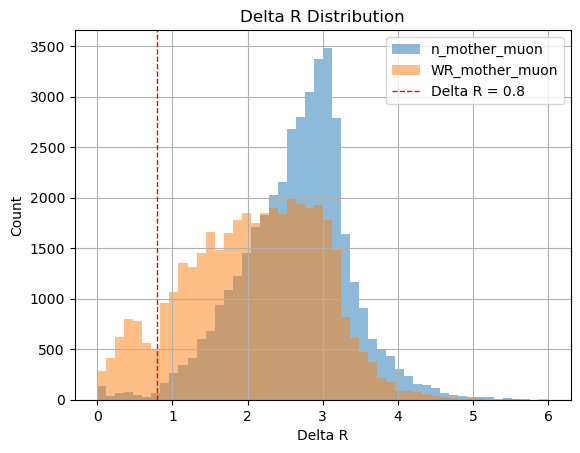

In [21]:
plt.hist(dr_total_n_mother_muon_all, bins=50, range=(0, 6), alpha=0.5, label='n_mother_muon')
plt.hist(dr_total_WR_mother_muon_all, bins=50, range=(0, 6), alpha=0.5, label='WR_mother_muon')
plt.axvline(0.8, color='red', linestyle='dashed', linewidth=1, label='Delta R = 0.8')
plt.xlabel('Delta R')
plt.ylabel('Count')
plt.title('Delta R Distribution')
plt.legend()
plt.grid()
plt.show()

## AK4 jet inside AK8

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()
genmother = events["GenPart_genPartIdxMother"].array()


## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

jet_pt = events["Jet_pt"].array()
jet_eta = events["Jet_eta"].array()
jet_phi = events["Jet_phi"].array()
jet_flovur = events["Jet_hadronFlavour"].array()

## mask
topmaskp = (gen_pdgid == 6) 
topmaskn = (gen_pdgid == -6)
botmaskp = (gen_pdgid == 5)
botmaskn = (gen_pdgid == -5)


top_etap = gen_eta[topmaskp]
top_phip = gen_phi[topmaskp]
bot_etap = gen_eta[botmaskp]
bot_phip = gen_phi[botmaskp]

top_etan = gen_eta[topmaskn]
top_phin = gen_phi[topmaskn]
bot_etan = gen_eta[botmaskn]
bot_phin = gen_phi[botmaskn]

#### WR mother b 중에서 top 안에 들어가는애 찾기 

dr_t_b = []
b_eta_for_m = [] # b가 -5 인 경우 해당하는 이벤트에 0.8보다 작은애가 있음
b_phi_for_m = [] # b가 -5 인 경우 해당하는 이벤트에 0.8보다 작은애가 있음
b_eta_for_p = [] # b가 5 인 경우 해당하는 이벤트에 0.8보다 작은애가 있음
b_phi_for_p = [] # b가 5 인 경우 해당하는 이벤트에 0.8보다 작은애가 있음
for i in range(len(top_etap)):
    if (len(top_etap[i]) != 0 and len(bot_etan[i] != 0)):
        deta_for_topp = top_etap[i][0] - bot_etan[i]
        dphi_for_topp = delta_phi(top_phip[i][0], bot_phin[i])
        dr_for_topp = np.sqrt(deta_for_topp**2 + dphi_for_topp**2)
        dr_t_b.append(dr_for_topp)
        if any(d < 0.8 for d in dr_for_topp):
            b_eta_for_m.append(bot_etan[i])
            b_phi_for_m.append(bot_phin[i])
        
    if (len(top_etan[i]) != 0 and len(bot_etap[i] != 0)):
        deta_for_topn = top_etan[i][0] - bot_etap[i]
        dphi_for_topn = delta_phi(top_phin[i][0], bot_phip[i])
        dr_for_topn = np.sqrt(deta_for_topn**2 + dphi_for_topn**2)
        dr_t_b.append(dr_for_topn)
        if any(d < 0.8 for d in dr_for_topn):
            b_eta_for_p.append(bot_etap[i])
            b_phi_for_p.append(bot_phip[i])

#### 그 b가 ak4중에 어떤애인지 찾기







b_eta_for_m:  [<Array [-0.535, -0.537, 0.231] type='3 * float32'>, <Array [-0.291, 0.287, -0.297, 0.287] type='4 * float32'>, <Array [1.21, 1.21] type='2 * float32'>, <Array [0.111, 0.115] type='2 * float32'>, <Array [-0.0803, -0.416, -0.0781] type='3 * float32'>, <Array [0.459, 0.458, 0.458, -1.07] type='4 * float32'>, <Array [1.64, -0.699, -0.734, -0.734, 1.64] type='5 * float32'>]


b_indices:  [[17], [12], [17], [], [14], [], [12], ..., [9], [15], [13], [], [15], [15]]
topmom_b_indices:  [[20], [15], [20], [18], [17], [12], ..., [19], [16], [14], [16, 19, 28], [18]]
[6, 5]
[-6, -5]
[-6, -5]
[9900014, -6, 5, -5]
[-6, -5]
[-6, -5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[-6, -5]
[-6, -5]
[-6, -5]
[9900014, 5]
[-6, -5]
[6, 5, 5]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5, 4, 4]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, 5, -5, -5]
[-6, -5]
[6, 5, 5]
[-6, -5]
[-6, -5]
[6, 5]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[]
[]
[]
[-6, -5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[]
[-6, -5]
[-6, -5]
[6, 6, 5]
[6, 5]
[-6, -5]
[6,

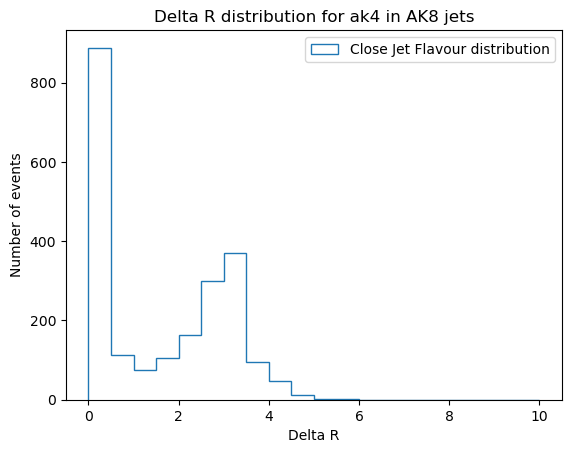

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()
genmother = events["GenPart_genPartIdxMother"].array()
topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

jet_pt = events["Jet_pt"].array()
jet_eta = events["Jet_eta"].array()
jet_phi = events["Jet_phi"].array()
jet_flovur = events["Jet_hadronFlavour"].array()
bmask = (gen_pdgid == 5)| (gen_pdgid == -5)  # b quark mask

# 1) 기본 마스크 ------------------------------------------------------------
b_mask      = (abs(gen_pdgid) == 5)          # b 혹은 anti-b
mother_pid  = gen_pdgid[genmother]           # b-쿼크의 엄마 PDG ID

top_mom_mask = (mother_pid ==  6) | (mother_pid == -6)
wr_mom_mask  = (mother_pid == 34) | (mother_pid == -34)

# 2) 두 조건을 합쳐 최종 b-쿼크 마스크 --------------------------------------
topmom_b_mask = b_mask & (top_mom_mask )
WRmom_b_mask = b_mask & (wr_mom_mask)

# 3) 이벤트 안에서의 인덱스 추출 -------------------------------------------
positions  = ak.local_index(gen_pdgid, axis=1)   # [[0,1,2,…], …]
topmom_b_indices  = positions[topmom_b_mask]          # events × N_b  형태
WRmom_b_indices  = positions[WRmom_b_mask]          # events × N_b  형태
print("b_indices: ", WRmom_b_indices)
print("topmom_b_indices: ", topmom_b_indices)




#deltar
dr_total = []
dr_tb_total = []
min_idx = []
second_min_idx = []
third_min_idx = []
survived_jet = 0 
cleand_jet = 0
closejetflavor = []
for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    # fatjet
    top_etas = top_eta[i][1]
    top_phi = top_phi1[i][1]
    
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산

    
    dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr_jet) >1:
        idx = np.argsort(dr_jet)[0] #top AK8 jet index
        ## muon 중에 ak8 jet 과 R < 0.8 인 jet 갯수 찾기 
        ak8_eta = fatjet_eta[i][idx]
        ak8_phi = fatjet_phi[i][idx]

        b_eta = gen_eta[bmask]
        b_eta = b_eta[i]
        b_phi = gen_phi[bmask]
        b_phi = b_phi[i]

        b_deta = b_eta - ak8_eta
        b_dphi = b_phi - ak8_phi
        b_dphi = (b_dphi + np.pi) % (2 * np.pi) - np.pi
        b_dr = np.sqrt(b_deta**2 + b_dphi**2)
        dr_tb_total.append(b_dr)
        dr_tb_mask = b_dr < 0.8
        masked_pdgid = gen_pdgid[bmask]#b만 있는 pdgid
        masked_motheridx = genmother[bmask]#b 엄마의 인덱스 
        masked_mother_idx_less08 = masked_motheridx[i][dr_tb_mask]#i번째 이벤트에 거리가 0.8보다 작은 b 엄마 인덱스
        print(gen_pdgid[i][masked_mother_idx_less08])# i번쨰 이벤트의 엄마 인덱스를 통한 id
        # 엄마가 6 인 양수이면 b
        

        jet_deta = jet_eta[i] - ak8_eta
        jet_dphi = jet_phi[i] - ak8_phi
        jet_dphi = (jet_dphi + np.pi) % (2 * np.pi) - np.pi
        jet_dr = np.sqrt(jet_deta**2 + jet_dphi**2)
        dr_total.append(jet_dr)
        jet_mask = jet_dr < 0.8
        jet_dr = jet_dr[jet_mask]
        #print(jet_flovur[i][jet_mask])
        close_jet_flovur = jet_flovur[i][jet_mask]
        closejetflavor.append(close_jet_flovur)



dr_total = ak.flatten(dr_tb_total)

plt.hist(dr_total, bins=20, range=(0, 10), histtype='step', label='Close Jet Flavour distribution')
#plt.hist(closet_
#plt.hist(dr_total, bins=100, range=(0, 5), histtype='step', label='DR distribution')

plt.xlabel('Delta R')
plt.ylabel('Number of events')
plt.title('Delta R distribution for ak4 in AK8 jets')
plt.legend()

        









topmom_b_indices:  [[20], [15], [20], [18], [17], [12], ..., [19], [16], [14], [16, 19, 28], [18]]
b_indices:  [[17], [12], [17], [], [14], [], [12], ..., [9], [15], [13], [], [15], [15]]
[<Array [20] type='1 * int64'>]


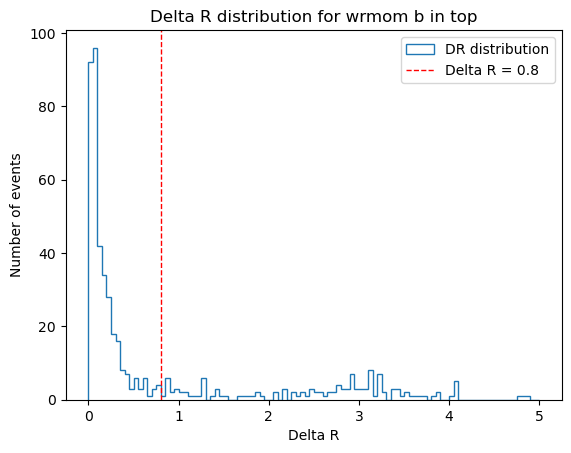

In [32]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()
genstatus = events["GenPart_statusFlags"].array()
genmother = events["GenPart_genPartIdxMother"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

muon_pt = events["Jet_pt"].array()
muon_eta = events["Jet_eta"].array()
muon_phi = events["Jet_phi"].array()


# 1) 기본 마스크 ------------------------------------------------------------
b_mask      = (abs(gen_pdgid) == 5)          # b 혹은 anti-b
mother_pid  = gen_pdgid[genmother]           # b-쿼크의 엄마 PDG ID

top_mom_mask = (mother_pid ==  6) | (mother_pid == -6)
wr_mom_mask  = (mother_pid == 34) | (mother_pid == -34)

# 2) 두 조건을 합쳐 최종 b-쿼크 마스크 --------------------------------------
topmom_b_mask = b_mask & (top_mom_mask )
WRmom_b_mask = b_mask & (wr_mom_mask)

# 3) 이벤트 안에서의 인덱스 추출 -------------------------------------------
positions  = ak.local_index(gen_pdgid, axis=1)   # [[0,1,2,…], …]
topmom_b_indices  = positions[topmom_b_mask]          # events × N_b  형태
WRmom_b_indices  = positions[WRmom_b_mask]          # events × N_b  형태
print("topmom_b_indices: ", topmom_b_indices)
print("b_indices: ", WRmom_b_indices)
print([topmom_b_indices[0]])
# 필요하다면 순수 Python 리스트로
#b_indices_list = ak.to_list(b_indices)
drdr =[]
for i in range(len(top_eta)):
    deta = top_eta[i][0]-gen_eta[i][WRmom_b_indices[0]]
    dphi = top_phi1[i][0] -gen_phi[i][WRmom_b_indices[0]]
    dphi = (dphi + np.pi) % (2 * np.pi) - np.pi
    dr = np.sqrt(deta**2 + dphi**2)
    #print(dr)
    drdr.append(dr)
drdr = ak.flatten(drdr)
plt.hist(drdr, bins=100, range=(0, 5), histtype='step', label='DR distribution')
plt.axvline(0.8, color='red', linestyle='dashed', linewidth=1, label='Delta R = 0.8')
plt.xlabel('Delta R')
plt.ylabel('Number of events')
plt.title('Delta R distribution for wrmom b in top')
plt.legend()
plt.show()





Number of WR* mother bottom quarks with Delta R < 0.8:  9
Number of t mother bottom quarks outside of AK8  41


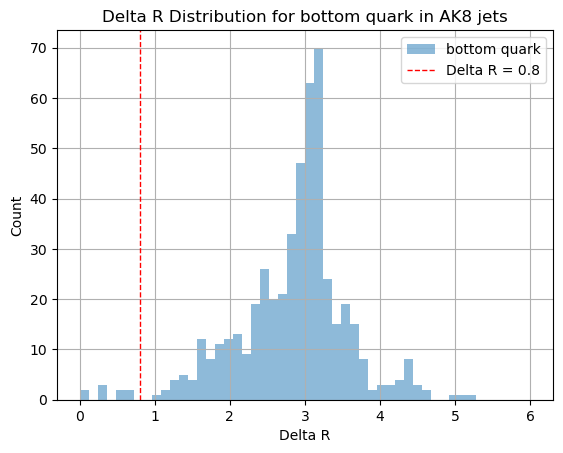

"plt.hist(dphi1, bins=50, range=(-np.pi, np.pi), alpha=0.5, label='bottom quark')"

In [53]:
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()


lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()
lhe_mass = events["LHEPart_mass"].array()
lhe_status = events["LHEPart_status"].array()

gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()
fatjet_mass = events["FatJet_mass"].array()

muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)
bottom_mask = (lhe_pdgid == 5) | (lhe_pdgid == -5)

bottom_eta = lhe_eta[bottom_mask]
bottom_phi = lhe_phi[bottom_mask]
bottom_pt = lhe_pt[bottom_mask]

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(eta1, phi1, eta2, phi2):
    d_eta = eta1 - eta2
    d_phi = delta_phi(phi1, phi2)
    return np.sqrt(d_eta**2 + d_phi**2)

#lepton , muon 2 = WR mother
#lepton , muon 1 = n mother
#bottom quark 2 = WR* mother
#bottom quark 1 = t mother  

muonpt1 = muon_pt[:, 0]#muon 0 =  n mother
muonpt2 = muon_pt[:, 1]# muon 1 = WR mother
bottompt1 = bottom_pt[:, 0]#bottom quark 0 = top mother
bottompt2 = bottom_pt[:, 1]#bottom quark 1 = WR* mother

bottom_eta1 = bottom_eta[:, 0]#bottom quark 0 = top mother
bottom_eta2 = bottom_eta[:, 1]#bottom quark 1 = WR* mother
bottom_phi1 = bottom_phi[:, 0]#bottom quark 0 = top mother
bottom_phi2 = bottom_phi[:, 1]#bottom quark 1 = WR* mother

all_dr = []
all_dr_2 = []
dphi1 = []
less_than_08_1 = 0
less_than_08_2 = 0
for i in range(len(fatjet_pt)):
    if ((bottompt2[i]) != 0 ):
        if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
            continue
        # fatjet
        top_etas = top_eta[i][0]
        top_phi = top_phi1[i][0]
    
        delta_eta = fatjet_eta[i] - top_etas
    
        delta_phi = fatjet_phi[i] -top_phi 
        delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
        #ΔR 계산
        dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
        if len(dr_jet) >1:
            idx = np.argsort(dr_jet)[0] #top AK8 jet index
            ## muon 중에 ak8 jet 과 R < 0.8 인 jet 갯수 찾기 
            ak8_eta = fatjet_eta[i][idx]
            ak8_phi = fatjet_phi[i][idx]


            ## WR* mother bottom quark
            delta_eta1 = bottom_eta2[i] - ak8_eta
            delta_phi1 = bottom_phi2[i] - ak8_phi
            delta_phi1 = (delta_phi1 + np.pi) % (2 * np.pi) - np.pi
            dr_bottom1 = np.sqrt(delta_eta1**2 + delta_phi1**2)
            all_dr.append(dr_bottom1)
            dphi1.append(delta_phi1)
            if dr_bottom1 < 0.8:
                less_than_08_1 += 1
    if ((bottompt1[i]) != 0 ):
        if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
            continue
        # fatjet
        top_etas = top_eta[i][0]
        top_phi = top_phi1[i][0]
        delta_eta = fatjet_eta[i] - top_etas
        delta_phi = fatjet_phi[i] -top_phi
        delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
        #ΔR 계산
        dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
        if len(dr_jet) >1:
            idx = np.argsort(dr_jet)[0]
            ## t mother bottom quark
            delta_eta2 = bottom_eta1[i] - ak8_eta
            delta_phi2 = bottom_phi1[i] - ak8_phi
            delta_phi2 = (delta_phi2 + np.pi) % (2 * np.pi) - np.pi
            dr_bottom2 = np.sqrt(delta_eta2**2 + delta_phi2**2)
            all_dr_2.append(dr_bottom2)
            if dr_bottom2 > 0.8:
                less_than_08_2 += 1


print("Number of WR* mother bottom quarks with Delta R < 0.8: ", less_than_08_1)
print("Number of t mother bottom quarks outside of AK8 ", less_than_08_2)

plt.hist(all_dr, bins=50, range=(0, 6), alpha=0.5, label='bottom quark')
plt.axvline(0.8, color='red', linestyle='dashed', linewidth=1, label='Delta R = 0.8')
plt.xlabel('Delta R')
plt.ylabel('Count')
plt.title('Delta R Distribution for bottom quark in AK8 jets')
plt.legend()
plt.grid()
plt.show()

"plt.hist(dphi1, bins=50, range=(-np.pi, np.pi), alpha=0.5, label='bottom quark')"


For all files 


In [60]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm  # ✅ 진행률 표시

vector.register_awkward()

# 모든 .root 파일 경로 가져오기
path = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/"
file_list = sorted(glob.glob(path + "*.root"))

# 누적 리스트
def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)

less_than_08_1 = 0
less_than_08_2 = 0
total_events = 0
all_dr = []
all_dr_2 = []

# tqdm으로 파일 리스트 순회
for sample in tqdm(file_list, desc="Processing ROOT files"):
    file = uproot.open(sample)
    events = file["Events"]

    lhe_pdgid = events["LHEPart_pdgId"].array()
    lhe_pt = events["LHEPart_pt"].array()
    lhe_eta = events["LHEPart_eta"].array()
    lhe_phi = events["LHEPart_phi"].array()
    lhe_mass = events["LHEPart_mass"].array()
    lhe_status = events["LHEPart_status"].array()

    gen_pdgid = events["GenPart_pdgId"].array()
    gen_pt = events["GenPart_pt"].array()
    gen_eta = events["GenPart_eta"].array()
    gen_phi = events["GenPart_phi"].array()

    topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
    top_eta = gen_eta[topmask]
    top_phi1 = gen_phi[topmask]

    ## Fatjet 
    fatjet_pt = events["FatJet_pt"].array()
    fatjet_eta = events["FatJet_eta"].array()
    fatjet_phi = events["FatJet_phi"].array()
    fatjet_mass = events["FatJet_mass"].array()

    muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)
    bottom_mask = (lhe_pdgid == 5) | (lhe_pdgid == -5)

    bottom_eta = lhe_eta[bottom_mask]
    bottom_phi = lhe_phi[bottom_mask]
    bottom_pt = lhe_pt[bottom_mask]

    def delta_phi(phi1, phi2):
        d = phi1 - phi2
        # wrap to [-π, +π]
        return (d + np.pi) % (2*np.pi) - np.pi

    def delta_r(eta1, phi1, eta2, phi2):
        d_eta = eta1 - eta2
        d_phi = delta_phi(phi1, phi2)
        return np.sqrt(d_eta**2 + d_phi**2)

#lepton , muon 2 = WR mother
#lepton , muon 1 = n mother
#bottom quark 2 = WR* mother
#bottom quark 1 = t mother  

    
    bottompt1 = bottom_pt[:, 0]#bottom quark 0 = top mother
    bottompt2 = bottom_pt[:, 1]#bottom quark 1 = WR* mother

    bottom_eta1 = bottom_eta[:, 0]#bottom quark 0 = top mother
    bottom_eta2 = bottom_eta[:, 1]#bottom quark 1 = WR* mother
    bottom_phi1 = bottom_phi[:, 0]#bottom quark 0 = top mother
    bottom_phi2 = bottom_phi[:, 1]#bottom quark 1 = WR* mother

    for i in range(len(fatjet_pt)):
        
        if ((bottompt2[i]) != 0 ):
            if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
                continue
            # fatjet
            total_events += 1
            top_etas = top_eta[i][0]
            top_phi = top_phi1[i][0]
    
            delta_eta = fatjet_eta[i] - top_etas
    
            delta_phi = fatjet_phi[i] -top_phi 
            delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
            #ΔR 계산
            dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
            if len(dr_jet) >1:
                idx = np.argsort(dr_jet)[0] #top AK8 jet index
                ## muon 중에 ak8 jet 과 R < 0.8 인 jet 갯수 찾기 
                ak8_eta = fatjet_eta[i][idx]
                ak8_phi = fatjet_phi[i][idx]


                ## WR* mother bottom quark
                delta_eta1 = bottom_eta2[i] - ak8_eta
                delta_phi1 = bottom_phi2[i] - ak8_phi
                delta_phi1 = (delta_phi1 + np.pi) % (2 * np.pi) - np.pi
                dr_bottom1 = np.sqrt(delta_eta1**2 + delta_phi1**2)
                all_dr.append(dr_bottom1)
                if dr_bottom1 < 0.8:
                    less_than_08_1 += 1
        if ((bottompt1[i]) != 0 ):
            if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
                continue
            # fatjet
            top_etas = top_eta[i][0]
            top_phi = top_phi1[i][0]
            delta_eta = fatjet_eta[i] - top_etas
            delta_phi = fatjet_phi[i] -top_phi
            delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
            #ΔR 계산
            dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
            if len(dr_jet) >1:
                idx = np.argsort(dr_jet)[0]
                ## t mother bottom quark
                delta_eta2 = bottom_eta1[i] - ak8_eta
                delta_phi2 = bottom_phi1[i] - ak8_phi
                delta_phi2 = (delta_phi2 + np.pi) % (2 * np.pi) - np.pi
                dr_bottom2 = np.sqrt(delta_eta2**2 + delta_phi2**2)
                all_dr_2.append(dr_bottom2)
                if dr_bottom2 > 0.8:
                    less_than_08_2 += 1
    
    




Processing ROOT files: 100%|██████████| 80/80 [12:14<00:00,  9.18s/it]


Number of WR* mother bottom quarks with Delta R < 0.8:  678
Number of t mother bottom quarks outside of AK8  3303
Total events processed:  39968


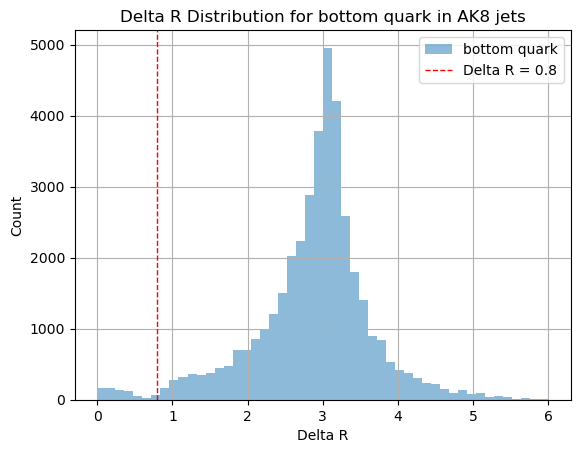

"plt.hist(dphi1, bins=50, range=(-np.pi, np.pi), alpha=0.5, label='bottom quark')"

In [61]:
print("Number of WR* mother bottom quarks with Delta R < 0.8: ", less_than_08_1)
print("Number of t mother bottom quarks outside of AK8 ", less_than_08_2)
print("Total events processed: ", total_events)
plt.hist(all_dr, bins=50, range=(0, 6), alpha=0.5, label='bottom quark')
plt.axvline(0.8, color='red', linestyle='dashed', linewidth=1, label='Delta R = 0.8')
plt.xlabel('Delta R')
plt.ylabel('Count')
plt.title('Delta R Distribution for bottom quark in AK8 jets')
plt.legend()
plt.grid()
plt.show()

"plt.hist(dphi1, bins=50, range=(-np.pi, np.pi), alpha=0.5, label='bottom quark')"